<h1><center>Bellabeat's Data Analysis Case Study!</center></h1>

<img src="bellabeata logo.jpg">

##### Bellabeat is a high tech manufacturer of beautifully designed health focused smart products for women since 2013. Inspiring and empowring women with knowledge about their own health and habits, Bellabeat has grown rapaidly and quickly positioned itself as a tech driven wellness company for females. 

##### The co-founder and Chief Creative Officer, Urska Srsen is confident thet an analysis for non-Bellabeat cosumer data (i.e. FitBit fitness tracker usage data) would reveal more opportunities for growth

### Bellabeat: How Can A Wellness Technology Company Play It Smart?

#### Business Task:

Analyze FitBit Fitness Tracker Data to gain insights into how consumers are using the FitBit App and Discuss over treds and insights for Bella beat marketing strategy.

#### Business Objectives:

1. What are the trends identified?

2. How could these trends apply to Bellabeat customers?

3. How could these trends help influence Bellabeat marketing strategy?

#### Key Stakeholders:

1. Urska Srsen: Bellabeat's co-founder and CEO

2. Sando Mur: Mathematician, Bellbeat's co-founder and key member of Bellabeat executive team

3. Bellabeat marketing analytics tram: A team of data analysts guiding Bellabeat's marketing strategy

#### Information on Data Source:

1. The data is publicly available on Kaggle: FitBit Fitness Tracker Data and stored in 18 csv files

2. Generated by respondents from a distributed survey via Amazon Mechanical Turk between 12th March 2016 to 12th May 2016

3. 30 FitBit users who consented to the submission submission of personal tracker data 

4. Data collected includes (1) Physical activity recorded in minutes, (2) heart rate, (3) sleep monitoring, (4) daily activity and (5) steps.

### Importing Python Packages/Libraries

In [8]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
pd.plotting.register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.25)

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (16, 10)

In [9]:
# Set max columns to be displayed
pd.set_option('display.max_columns', 99)

### Importing Data 

In [10]:
df = pd.read_csv('D:\HP User Data\Downloads\Documents\SQL Server Management Studio\Bellabeat Data Analysis Project\FitBit Dataset\dailyActivity_merged.csv')
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [11]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [12]:
df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [13]:
df.corr()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
Id,1.000000,0.185721,0.241000,0.238816,0.188015,0.308691,0.026665,0.019629,-0.015698,0.303608,0.051158,-0.098754,-0.043319,0.396671
TotalSteps,0.185721,1.000000,0.985369,0.984822,0.181849,0.740115,0.507105,0.692208,0.070505,0.667079,0.498693,0.569600,-0.327484,0.591568
TotalDistance,0.241000,0.985369,1.000000,0.999505,0.188332,0.794582,0.470758,0.662002,0.082389,0.681297,0.462899,0.516300,-0.288094,0.644962
TrackerDistance,0.238816,0.984822,0.999505,1.000000,0.162585,0.794338,0.470277,0.661365,0.074591,0.680816,0.463154,0.514713,-0.289343,0.645313
LoggedActivitiesDistance,0.188015,0.181849,0.188332,0.162585,1.000000,0.150852,0.076527,0.138302,0.154996,0.234443,0.053860,0.102135,-0.046999,0.207595
VeryActiveDistance,0.308691,0.740115,0.794582,0.794338,0.150852,1.000000,0.192986,0.157669,0.046117,0.826681,0.211730,0.059845,-0.061754,0.491959
ModeratelyActiveDistance,0.026665,0.507105,0.470758,0.470277,0.076527,0.192986,1.000000,0.237847,0.005793,0.225464,0.946934,0.162092,-0.221436,0.216790
LightActiveDistance,0.019629,0.692208,0.662002,0.661365,0.138302,0.157669,0.237847,1.000000,0.099503,0.154966,0.220129,0.885697,-0.413552,0.466917
SedentaryActiveDistance,-0.015698,0.070505,0.082389,0.074591,0.154996,0.046117,0.005793,0.099503,1.000000,0.008258,-0.022361,0.124185,0.035475,0.043652
VeryActiveMinutes,0.303608,0.667079,0.681297,0.680816,0.234443,0.826681,0.225464,0.154966,0.008258,1.000000,0.312420,0.051926,-0.164671,0.615838


### Cleaning Duplicate Data

In [14]:
daily_sleep = pd.read_csv('D:\HP User Data\Downloads\Documents\SQL Server Management Studio\Bellabeat Data Analysis Project\FitBit Dataset\sleepDay_merged.csv')
daily_sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [15]:
daily_sleep.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [16]:
weight_log = pd.read_csv('D:\HP User Data\Downloads\Documents\SQL Server Management Studio\Bellabeat Data Analysis Project\FitBit Dataset\weightLogInfo_merged.csv')
weight_log.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [17]:
weight_log.describe()

,Id,WeightKg,WeightPounds,Fat,BMI,LogId
count,6.700000e+01,67.000000,67.000000,2.00000,67.000000,6.700000e+01
mean,7.009282e+09,72.035821,158.811801,23.50000,25.185224,1.461772e+12
std,1.950322e+09,13.923206,30.695415,2.12132,3.066963,7.829948e+08
min,1.503960e+09,52.599998,115.963147,22.00000,21.450001,1.460444e+12
25%,6.962181e+09,61.400002,135.363832,22.75000,23.959999,1.461079e+12
50%,6.962181e+09,62.500000,137.788914,23.50000,24.389999,1.461802e+12
75%,8.877689e+09,85.049999,187.503152,24.25000,25.559999,1.462375e+12
max,8.877689e+09,133.500000,294.317120,25.00000,47.540001,1.463098e+12


In [18]:
def find_duplicated_data(df):
    return df[df.duplicated()]

In [19]:
# Only daily sleep data has duplicated data
len(find_duplicated_data(df)), len(find_duplicated_data(daily_sleep)), len(find_duplicated_data(weight_log))

(0, 3, 0)

In [20]:
daily_sleep.shape

(413, 5)

In [21]:
# There are some duplicated data in the daily sleep data
daily_sleep[daily_sleep.duplicated(keep=False)]

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
160,4388161847,5/5/2016 12:00:00 AM,1,471,495
161,4388161847,5/5/2016 12:00:00 AM,1,471,495
222,4702921684,5/7/2016 12:00:00 AM,1,520,543
223,4702921684,5/7/2016 12:00:00 AM,1,520,543
379,8378563200,4/25/2016 12:00:00 AM,1,388,402
380,8378563200,4/25/2016 12:00:00 AM,1,388,402


In [22]:
# Dropping the duplicates
daily_sleep.drop_duplicates(inplace=True, ignore_index=False)

### Merging Sleep Data With Full Daily Data

In [23]:
# Merging full daily data with daily sleep data, on unique combinations of ID and Day
# Using Left Joing to keep all the records in the full daily data
df_merge = pd.merge(df, daily_sleep, on=['Id'], how='left')
df_merge.shape

(12575, 19)

In [24]:
df_merge.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,4/12/2016 12:00:00 AM,1.0,327.0,346.0
1,1503960366,4/12/2016,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,4/13/2016 12:00:00 AM,2.0,384.0,407.0
2,1503960366,4/12/2016,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,4/15/2016 12:00:00 AM,1.0,412.0,442.0
3,1503960366,4/12/2016,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,4/16/2016 12:00:00 AM,2.0,340.0,367.0
4,1503960366,4/12/2016,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,4/17/2016 12:00:00 AM,1.0,700.0,712.0


In [25]:
# Sort the data by Id
df_merge.sort_values(by=['Id'], inplace=True)
df_merge.Id.nunique()

33

In [26]:
# A lot of missing values in the daily sleep data, i.e. 1.8% missing
df_merge.isna().mean()

Id                          0.000000
ActivityDate                0.000000
TotalSteps                  0.000000
TotalDistance               0.000000
TrackerDistance             0.000000
LoggedActivitiesDistance    0.000000
VeryActiveDistance          0.000000
ModeratelyActiveDistance    0.000000
LightActiveDistance         0.000000
SedentaryActiveDistance     0.000000
VeryActiveMinutes           0.000000
FairlyActiveMinutes         0.000000
LightlyActiveMinutes        0.000000
SedentaryMinutes            0.000000
Calories                    0.000000
SleepDay                    0.018052
TotalSleepRecords           0.018052
TotalMinutesAsleep          0.018052
TotalTimeInBed              0.018052
dtype: float64

- These missing sleeping data cannot be resolved easily, but they are left as it is, and will be analyzed later.

In [27]:
# Changing variable name to 'df' to simplify code
df = df_merge.copy()

In [28]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'SleepDay',
       'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed'],
      dtype='object')

## Analyzing Heart Rate To Determine Average Wearing Hours Per Day

In [29]:
heart_rate = pd.read_csv('D:\HP User Data\Downloads\Documents\SQL Server Management Studio\Bellabeat Data Analysis Project\FitBit Dataset\heartrate_seconds_merged.csv')
heart_rate.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21,97
1,2022484408,4/12/2016 7:21,102
2,2022484408,4/12/2016 7:21,105
3,2022484408,4/12/2016 7:21,103
4,2022484408,4/12/2016 7:21,101


In [30]:
heart_rate.Id.nunique()

7

- Only 7 out of 33 users use this feature.
- Not every user uses the feature of tracking their heart rate every second, most likely for privacy reason or finding it not useful, because it is unlikely that a user wears such a device and accidentally forgot to turn on the feature.
- But this requires further survey for qualitative data in order to confirm this statement.
- This survey has a huge limitaion of only included quantitative data without any sorts of qualitative data that include important feedbacks from users, which is equally as important as quantitative data.

- This makes it not possible to determine average wearing hours for every user through the heart rate usage data, as not every user uses this feature.
- Sill, it's interesting to use analyze this to determine on average how many hours do the users use this feature every day.

In [31]:
heart_rate['Time'] = pd.to_datetime(heart_rate['Time'], infer_datetime_format=True)
heart_rate['Time'].head()

0   2016-04-12 07:21:00
1   2016-04-12 07:21:00
2   2016-04-12 07:21:00
3   2016-04-12 07:21:00
4   2016-04-12 07:21:00
Name: Time, dtype: datetime64[ns]

In [32]:
# Add a date column
heart_rate['Date'] = heart_rate.Time.dt.date

In [33]:
heart_rate.shape

(1048575, 4)

In [34]:
total_day_used_per_user = heart_rate.groupby('Id') ['Date'].nunique().sort_index()
total_day_used_per_user

Id
2022484408    31
2026352035     4
2347167796    18
4020332650    16
4388161847    30
4558609924    31
5553957443     2
Name: Date, dtype: int64

In [35]:
# Multiplied by 5 because the heart rate tracking takes place every 5 secs
avg_user_wearing_minute = heart_rate.Id.value_counts() * 5 / 3600
avg_user_wearing_minute.sort_index(inplace=True)
avg_user_wearing_minute

2022484408    214.033333
2026352035      3.458333
2347167796    212.059722
4020332650    396.473611
4388161847    346.872222
4558609924    266.900000
5553957443     16.556944
Name: Id, dtype: float64

In [36]:
# Preparing the data to calculate avg usage per day
avg_heart_rate_hour = pd.concat([avg_user_wearing_minute, total_day_used_per_user], axis=1)
avg_heart_rate_hour.columns = ['avg_minute', 'total_days']
avg_heart_rate_hour

,avg_minute,total_days
2022484408,214.033333,31
2026352035,3.458333,4
2347167796,212.059722,18
4020332650,396.473611,16
4388161847,346.872222,30
4558609924,266.900000,31
5553957443,16.556944,2


In [37]:
avg_heart_rate_hour['avg_hour'] = avg_heart_rate_hour['avg_minute'] / avg_heart_rate_hour['total_days']
avg_heart_rate_hour.sort_values('avg_hour', ascending=False, inplace=True)
avg_heart_rate_hour = avg_heart_rate_hour.reset_index().rename(columns={'index':'Id'})
avg_heart_rate_hour

,Id,avg_minute,total_days,avg_hour
0,4020332650,396.473611,16,24.779601
1,2347167796,212.059722,18,11.781096
2,4388161847,346.872222,30,11.562407
3,4558609924,266.900000,31,8.609677
4,5553957443,16.556944,2,8.278472
5,2022484408,214.033333,31,6.904301
6,2026352035,3.458333,4,0.864583


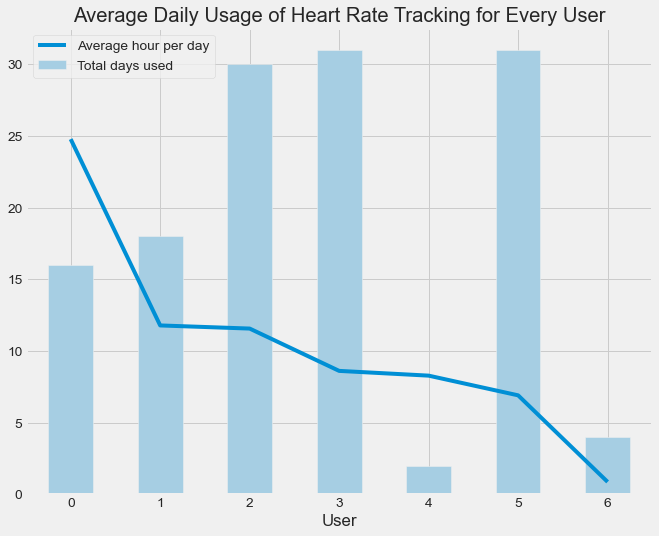

In [72]:
ax = avg_heart_rate_hour['total_days'].plot(kind='bar', colormap='Paired', label='Total days used', figsize=(10, 8))
avg_heart_rate_hour['avg_hour'].plot(kind='line', label='Average hour per day')
plt.title('Average Daily Usage of Heart Rate Tracking for Every User')
plt.xlabel('User')
plt.legend();

- The precision of the numbers are not exactly accurate as the heart rate tracking takes place for every 5 secs instead of every second, therefore the calcuations had to take into consideration the estimation, but the margin of error should be only within 1 hour.
- The average usage of heart rate traking is around 12 hours, with one user using for 24 hours for every day he turned on the feature for recording.
- Although most users averaged at 12 hours or less usage every day, the total days were much higher.
- In summary, for a total of 7 users observed, 13 users decided to turn on the heart tracking feature for more than 15 days however, most of them used the feature for around 12 hours a day. This shows that they could be neglecting the feature or turned off the feature voluntarily. Feedbacks from customers are required to verify this.

##### Recommendation: 
   The company can try to promot the importance of heart rate monitoring, and mention that there have also been case of people being saved from using smartwatch to alert the user that his heart rate is unusual. This can be incorporated into marketing strategy to showcase the ability of smartwatch to track heart rate accurately and continously, which eventually leads to beter quality of life.

## For Each User, On Every Day, What Is The Hour That They  Have The Highest Number of Steps?

In [50]:
hour_step = pd.read_csv('D:\HP User Data\Downloads\Documents\SQL Server Management Studio\Bellabeat Data Analysis Project\FitBit Dataset\hourlySteps_merged.csv')
hour_step.head()

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 0:00,373
1,1503960366,4/12/2016 1:00,160
2,1503960366,4/12/2016 2:00,151
3,1503960366,4/12/2016 3:00,0
4,1503960366,4/12/2016 4:00,0


In [59]:
# Get only the hour
hour_step['hour'] = pd.to_datetime(hour_step['ActivityHour']).dt.hour

In [60]:
hour_step.head()

,Id,ActivityHour,StepTotal,hour
0,1503960366,4/12/2016 0:00,373,0
1,1503960366,4/12/2016 1:00,160,1
2,1503960366,4/12/2016 2:00,151,2
3,1503960366,4/12/2016 3:00,0,3
4,1503960366,4/12/2016 4:00,0,4


In [61]:
# Calculate average steps for every hour
avg_hour_step = hour_step.groupby('hour')['StepTotal'].mean()

In [62]:
avg_hour_step.head()

hour
0    42.188437
1    23.102894
2    17.110397
3     6.426581
4    12.699571
Name: StepTotal, dtype: float64

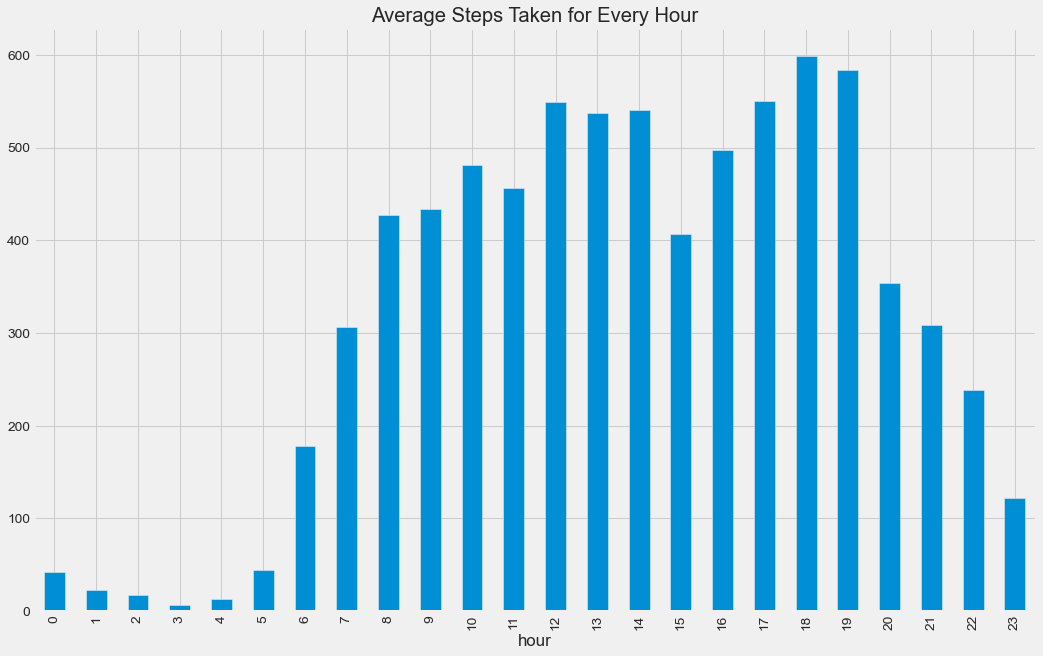

In [63]:
avg_hour_step.plot(kind='bar')
plt.title('Average Steps Taken for Every Hour');

- Working hours (0800 to 1700, or 8 Am to 5 Pm) tend to have many steps, which is normal.
- The highest steps taken are around 1800 on 6 Pm, which should be the hour where most users are the most active and like to enjoy their exercise routines.

### Let's Compare It With The Data of Hourly Calories Burned To Confirm It First

In [64]:
hour_cal = pd.read_csv('D:\HP User Data\Downloads\Documents\SQL Server Management Studio\Bellabeat Data Analysis Project\FitBit Dataset\hourlyCalories_merged.csv')
hour_cal.head()

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 0:00,81
1,1503960366,4/12/2016 1:00,61
2,1503960366,4/12/2016 2:00,59
3,1503960366,4/12/2016 3:00,47
4,1503960366,4/12/2016 4:00,48


In [67]:
hour_cal['hour'] = pd.to_datetime(hour_cal['ActivityHour']).dt.hour

In [68]:
avg_hour_cal = hour_cal.groupby('hour')['Calories'].mean()

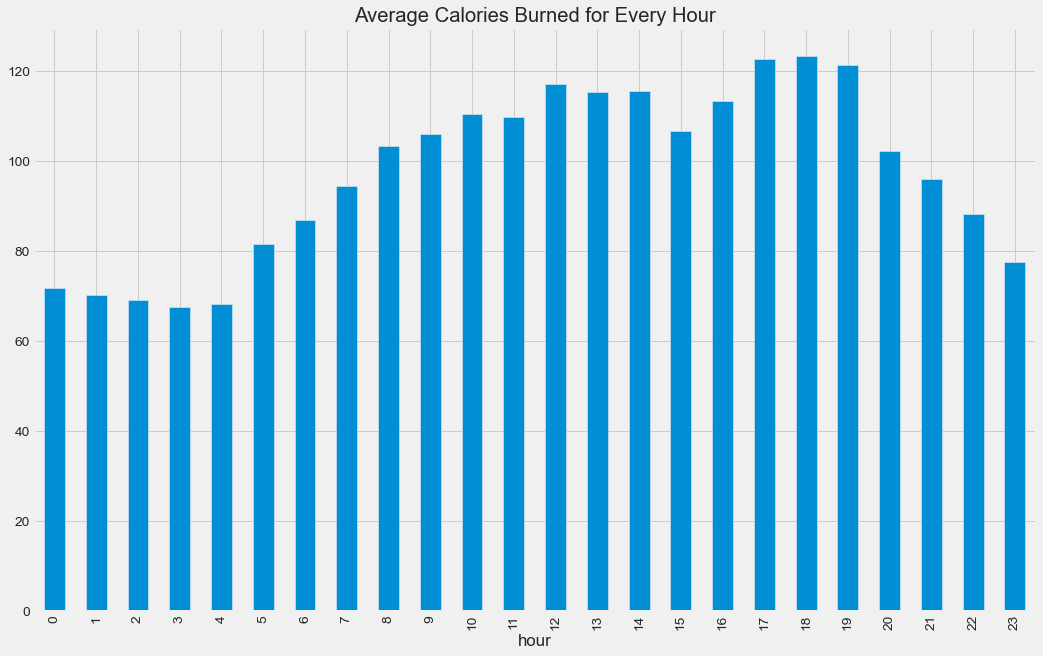

In [69]:
avg_hour_cal.plot(kind='bar')
plt.title('Average Calories Burned for Every Hour');

- This validates the statement above that the highest calories burned are centered around 6 PM.
- This also shows the positive correlation that the higher the number of steps taken, the higher the amount of calories burnt, which can also be seen more clearly with the chart below.

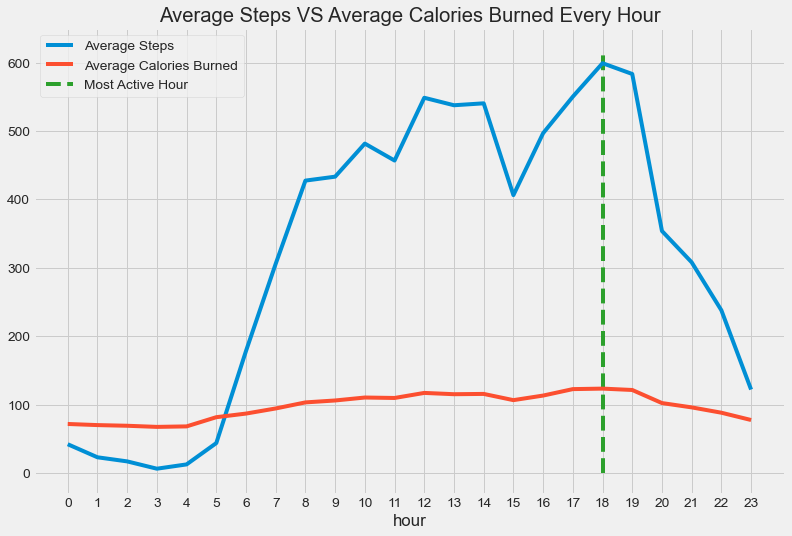

In [73]:
ax = avg_hour_step.plot(label='Average Steps', figsize=(12, 8))
avg_hour_cal.plot(ax=ax, label='Average Calories Burned')
plt.vlines(x=18, ymin=0, ymax=620, colors='tab:green', label='Most Active Hour', linestyle='dashed')
plt.xticks(np.arange(0, 24, 1))
plt.title('Average Steps VS Average Calories Burned Every Hour')
plt.legend();

#### Recommendation:
  Organize campigns that target this hour (around 6 PM) to promote the ability of smartwatch to track steps taken and calories burnt, so that many users who be able to notice the value of such product.

## Analyzing Sleep Data

In [74]:
daily_sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [75]:
daily_sleep['TotalTimeAwakeOnBed'] = daily_sleep['TotalTimeInBed'] - daily_sleep['TotalMinutesAsleep']

In [76]:
daily_sleep.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalTimeAwakeOnBed
count,4.100000e+02,410.000000,410.000000,410.000000,410.000000
mean,4.994963e+09,1.119512,419.173171,458.482927,39.309756
std,2.060863e+09,0.346636,118.635918,127.455140,46.710932
min,1.503960e+09,1.000000,58.000000,61.000000,0.000000
25%,3.977334e+09,1.000000,361.000000,403.750000,17.000000
50%,4.702922e+09,1.000000,432.500000,463.000000,25.500000
75%,6.962181e+09,1.000000,490.000000,526.000000,40.000000
max,8.792010e+09,3.000000,796.000000,961.000000,371.000000


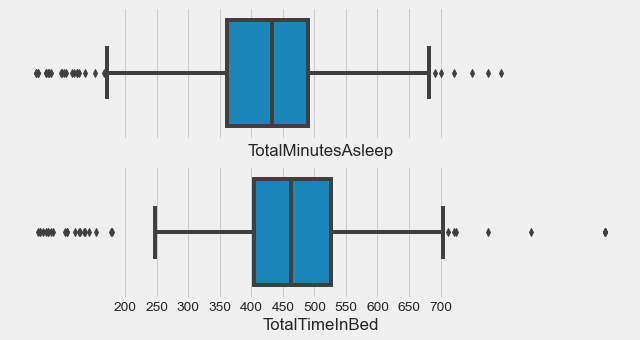

In [78]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(10,5))
for col, ax in zip(['TotalMinutesAsleep', 'TotalTimeInBed'], axes):
    sns.boxplot(data=daily_sleep, x=col, orient='h', ax=ax)
plt.xticks(np.arange(200, 750, 50)); 

In [79]:
400 / 60, 530 / 60, 375 / 60, 480 / 60

(6.666666666666667, 8.833333333333334, 6.25, 8.0)

- On average, users stay in bed for around 400 to 530 minutes, whichis around 7 hours to 9 hours.
- But most of them only sleep for around 375 to 480 minutes, which is around 6 hours 15 minutes to 8 hours.
- It is advisable for adults to sleep for around 7-9 hours per day, therefore the time spent on bed should be better uitized to become sleep time instead of being awake or doing other things.

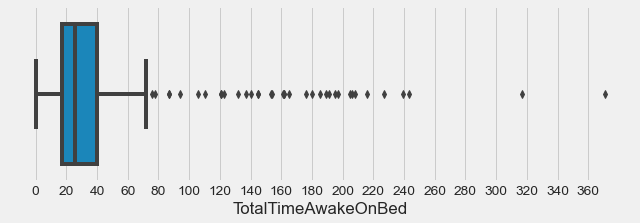

In [82]:
fig = plt.figure(figsize=(10, 3))
sns.boxplot(data=daily_sleep, x='TotalTimeAwakeOnBed')
plt.xticks(np.arange(0, daily_sleep['TotalTimeAwakeOnBed'].max(), 20));

- Most of them spent around 20-40 minutes staying on bed without actually being asleep, the outliers should be mistakes of the smartwatch or maybe the users were staying on bed for a very long time even after waking up. Need further data to validate this.

#### Recommendation:
 The 20-40 minutes could be lessened. Campaigns can be organized to promote features such as teaching the users to meditate to fall asleep faster.

## Analyzing Weight Data

In [83]:
weight_log.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


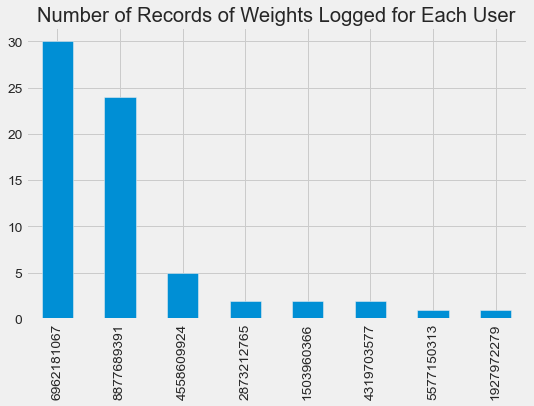

In [84]:
weight_log.Id.value_counts().plot(kind='bar', figsize=(8, 5))
plt.title('Number of Records of Weights Logged for Each User');

- Most of the users did not log their weights, either manually or automatically via smartwatch fuction.
- Only 6 users had some records of their weights, but only 2 persons had more than 20 days of records, while the rest of the users had 5 or less records.

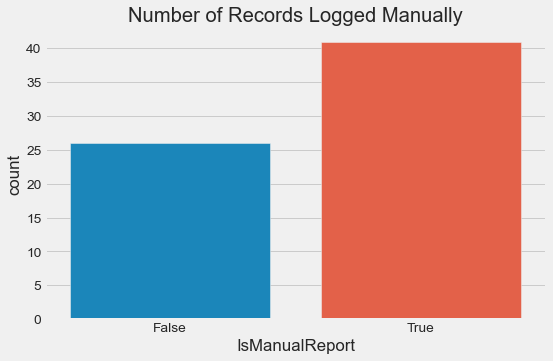

In [85]:
plt.figure(figsize=(8, 5))
sns.countplot(data=weight_log, x='IsManualReport')
plt.title('Number of Records Logged Manually');

- This shows that most users did not want to use this feature, probably due to the fact that they find it inconvenient to record them manually, or maybe the automatic weight logging feature was not working very well. Let's check it.

In [86]:
weight_log.groupby(['Id', 'IsManualReport']).count()

,,Date,WeightKg,WeightPounds,Fat,BMI,LogId
Id,IsManualReport,,,,,,
1503960366,True,2,2,2,1,2,2
1927972279,False,1,1,1,0,1,1
2873212765,True,2,2,2,0,2,2
4319703577,True,2,2,2,1,2,2
4558609924,True,5,5,5,0,5,5
5577150313,False,1,1,1,0,1,1
6962181067,True,30,30,30,0,30,30
8877689391,False,24,24,24,0,24,24


In [87]:
weight_log.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


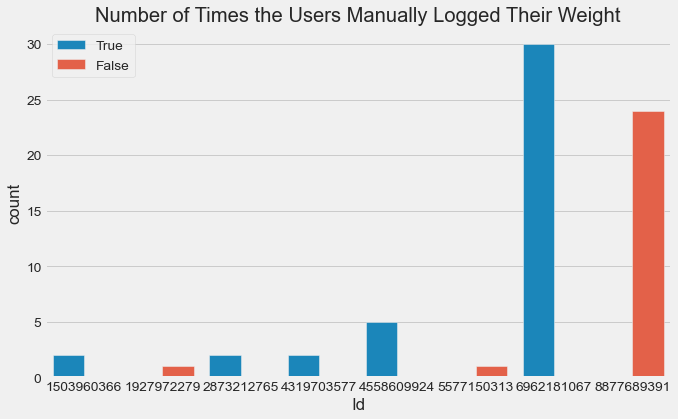

In [88]:
plt.figure(figsize=(10, 6))
sns.countplot(data=weight_log, x='Id', hue='IsManualReport', hue_order=[True, False])
plt.legend(loc='upper left')
plt.title('Number of Times the Users Manually Logged Their Weight');

- The chart shows that there is only 1 user that used the automatic weight logging feature for 24 days without manually logging at all.
- While 5 out of 6 users had only manually recorded their weights before.
- This further proves that most of them find it troublesome to record manually, with only one user making use of the automatic weight logging feature. More feedback from users or qualitative data are needed to understand more about this.

#### Recommendation: 
Promote the weight logging feature of smartwatch, and the ability of smartwatche to automatically log their weight accurately to be able to provide future suggestions such as weight controlling advice.

# Act Phase

#### 1. What are the trends identified?

- Majority of users (81.3%) are using the FitBit app to track sedentary activities and not using it for tracking their health habits.

- Users prefer to track their activities during weekdays as compared to weekends - perhaps because they spend more time outside on weekdays and stay in on weekends.

#### 2. How could these trends apply to Bellabeat customers?

- Both companies develop products focused on providing women with their health, habit and fitness data and encouraging them to understand their current habits and make healthy decisions. These common trends surrounding health and fitness can very well abe pplied to Bellabeat customers.

####  3. How could these trends help influence Bellabeat marketing strategy?

- Bellabeat marketing team can encourage users by educating and equipping them with knowledge about fitness benefits, suggest different types of exercise (ie. simple 10 minutes exercise on weekday and a more intense exercise on weekends) and calories intake and burnt rate information on the Bellabeat app.

- On weekends, Bellabeat app can also prompt notification to encourage users to exercise.